In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [353]:
df= pd.read_csv("Google_data.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [357]:
df.shape

(10841, 13)

In [359]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [361]:
df['Size'].isnull().sum()

0

In [363]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [365]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [367]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [373]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [375]:
df['Size'].value_counts().sum()

10841

In [377]:
8830+316+1695

10841

In [379]:
def convert_size(size):
    '''This function will convert the size cloumn to numeric by mltiplying the values with 1024
    if it has 'k' in it and 1024 if it has 'M' in it.'''
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k','')) * 1024
        elif 'M' in size:
            return float(size.replace('M','')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
        return(size)

In [381]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [391]:
df.rename(columns={'Size' : 'Size_in_bytes'}, inplace=True)

In [393]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [395]:
df['Size_in_bytes'].dtype

dtype('O')

In [397]:
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

In [399]:
df['Size_in_Mb'] = df['Size_in_bytes'] / (1024 * 1024)

In [401]:
df['Size_in_kb'] = df['Size_in_bytes'].apply(lambda x : x/(1024))

In [403]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [405]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [407]:
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\abish\AppData\Local\Temp\ipykernel_12156\2827484067.py:1: SyntaxWarning: invalid escape sequence '\+'
  df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()


10839

In [409]:
df['Installs'].value_counts().sum()

10841

In [411]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [415]:
print(df['Installs'].dtype)
print(df['Installs'].unique())

object
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size_in_bytes   0 non-null      float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_Mb      0 non-null      float64
 14  Size_in_kb      0 non-null      float64
dtypes: float64(4), object(11)
memory usage: 1.2+ MB


In [431]:
import re 
# convert 'Installs' column to string type
df['Installs'] = df['Installs'].astype(str)

#Remove non-numeric values ('Free') from the 'Installs' column
df['Installs'] = df['Installs'].apply(lambda x:x.replace('Free','0') if 'Free' in x else x)

#Remove the '+' character from the values
df['Installs'] = df['Installs'].apply(lambda x:x.replace('+',''))

#remove commas from the 'Installs' values
df['Installs'] = df['Installs'].str.replace(',','')

#convert 'Installs' values to itngers
df['Installs'] = df['Installs'].astype(int)

In [438]:
#removing + from Install's values
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
#removing , from Install's values
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
#converting Installs values to int
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size_in_bytes   0 non-null      float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_Mb      0 non-null      float64
 14  Size_in_kb      0 non-null      float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.2+ MB


In [444]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

In [446]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,NaN,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,NaN,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,NaN,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,NaN,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,NaN


In [460]:
#marking a new column called 'Installs_category' which will have category of the Installs
bins =[-1, 0, 10, 1000, 10000, 100000, 1000000, 100000000, 10000000000]
labels=['no','Very Low','Low','Moderate','More than moderate','High','Very High','Top Notch']
df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=labels)

In [462]:
df['Installs_category'].value_counts()

Installs_category
Very High             2702
Low                   2161
High                  2118
More than moderate    1648
Moderate              1531
Very Low               535
Top Notch              130
no                      16
Name: count, dtype: int64

In [466]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [470]:
df['Price'].isnull().sum()

0

In [476]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: count, Length: 93, dtype: int64

In [482]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\abish\AppData\Local\Temp\ipykernel_12156\3867966849.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()


10040

In [484]:
800+10041

10841

In [492]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'Price' column
def clean_price(df):
    """
    Cleans the 'Price' column of a DataFrame by removing non-numeric characters and converting it to float.

    Args:
        df (pandas.DataFrame): The DataFrame containing the 'Price' column.

    Returns:
        pandas.DataFrame: The DataFrame with the cleaned 'Price' column.
    """

    # Replace 'Everyone' with '0'
    df['Price'] = df['Price'].apply(lambda x: str(x).replace('Everyone', '0') if 'Everyone' in str(x) else x)

    # Remove non-numeric characters (except '.' and '+' or '-')
    df['Price'] = df['Price'].astype(str).str.replace(r'[^\d\.]', '', regex=True)

    # Convert to float
    df['Price'] = pd.to_numeric(df['Price'])

    return df

# Clean the 'Price' column in your DataFrame
df = clean_price(df)

In [494]:
df['Price'].dtype

dtype('float64')

In [500]:
print(f"Min price is : {df['Price'].min()}$")
print(f"Max price is : {df['Price'].max()}$")
print(f"Average price is : {df['Price'].mean()}$")

Min price is : 0.0$
Max price is : 400.0$
Average price is : 1.0272733142699015$


In [502]:
df.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,0.0,1.084100e+04,10841.000000,0.0,0.0
mean,4.193338,NaN,1.546291e+07,1.027273,NaN,NaN
std,0.537431,NaN,8.502557e+07,15.948971,NaN,NaN
min,1.000000,NaN,0.000000e+00,0.000000,NaN,NaN
25%,4.000000,NaN,1.000000e+03,0.000000,NaN,NaN
50%,4.300000,NaN,1.000000e+05,0.000000,NaN,NaN
75%,4.500000,NaN,5.000000e+06,0.000000,NaN,NaN
max,19.000000,NaN,1.000000e+09,400.000000,NaN,NaN


In [504]:
df.isnull().sum()

App                      0
Category                 0
Rating                1474
Reviews                  0
Size_in_bytes        10841
Installs                 0
Type                     1
Price                    0
Content Rating           1
Genres                   0
Last Updated             0
Current Ver              8
Android Ver              3
Size_in_Mb           10841
Size_in_kb           10841
Installs_category        0
dtype: int64

In [506]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        10841
Size_in_Mb           10841
Size_in_kb           10841
Rating                1474
Current Ver              8
Android Ver              3
Type                     1
Content Rating           1
App                      0
Category                 0
Reviews                  0
Installs                 0
Price                    0
Genres                   0
Last Updated             0
Installs_category        0
dtype: int64

In [508]:
df.isnull().sum().sum()

34010

In [512]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size_in_bytes        100.000000
Size_in_Mb           100.000000
Size_in_kb           100.000000
Rating                13.596532
Current Ver            0.073794
Android Ver            0.027673
Type                   0.009224
Content Rating         0.009224
App                    0.000000
Category               0.000000
Reviews                0.000000
Installs               0.000000
Price                  0.000000
Genres                 0.000000
Last Updated           0.000000
Installs_category      0.000000
dtype: float64

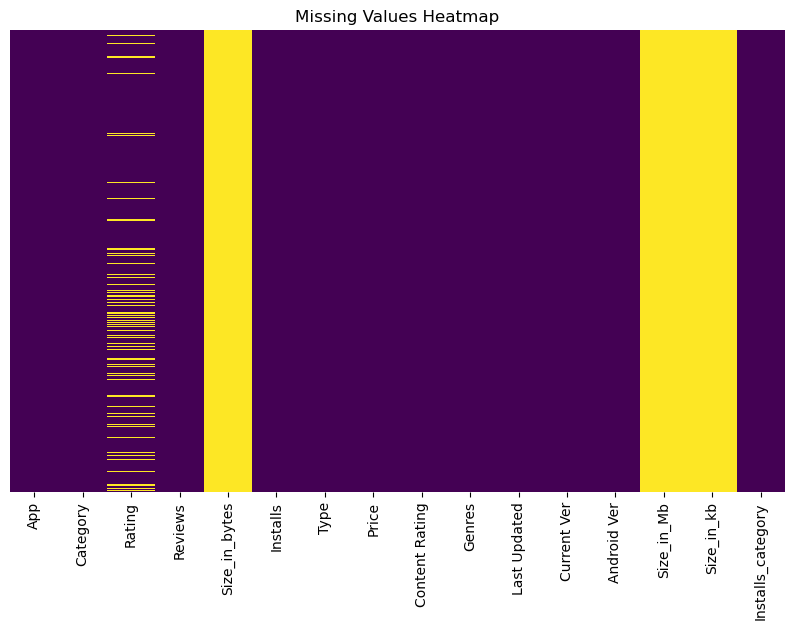

In [516]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

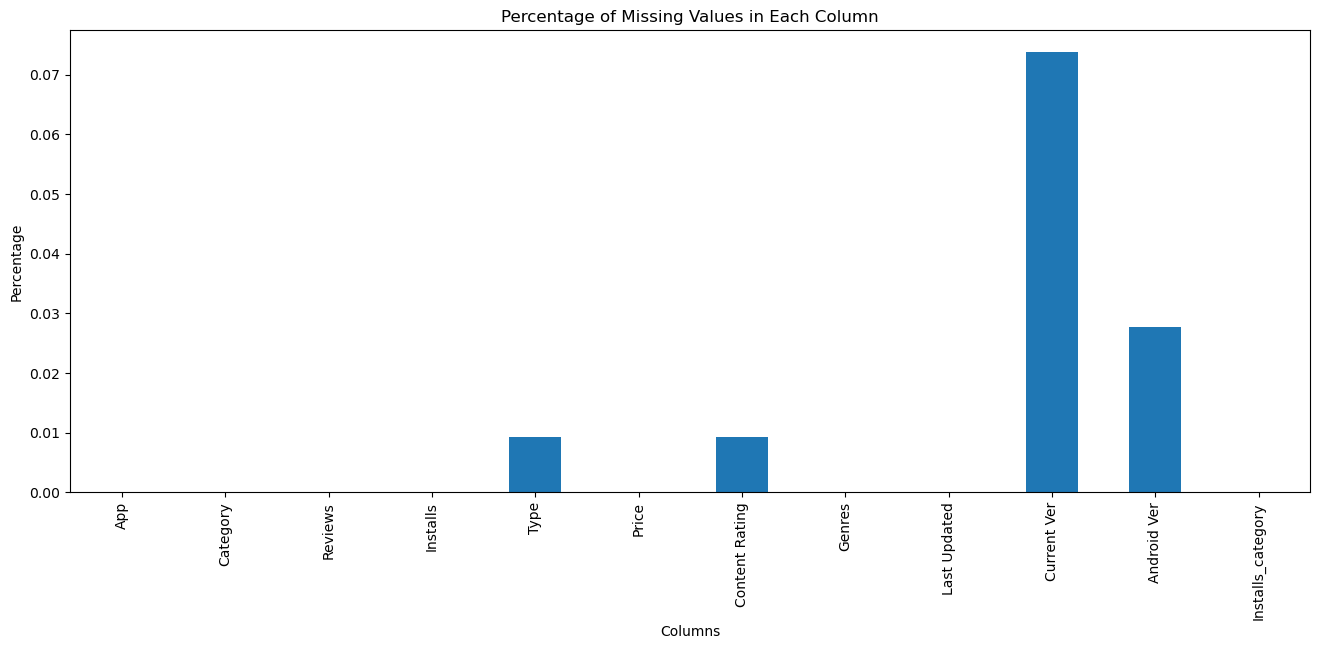

In [522]:
# Create the bar plot
plt.figure(figsize=(16, 6))
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_less_than_1.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

In [ ]:

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(missing_percentage.to_frame().T, cmap='viridis', annot=True)  # Transpose for column labels
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage')
plt.title('Percentage of Missing Values in Each Column (Heatmap)')
plt.show()


In [14]:
#we can calculate the pearson correlation coefficient using scipy as well as follows
import pandas as pd
from scipy import stats

# Load the dataframe
df = pd.read_csv("Google_data.csv")  # Replace with your actual dataset path
# Convert 'Reviews' and 'Installs' to numeric, forcing errors to NaN
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows with missing values after conversion
df_clean = df.dropna(subset=['Reviews', 'Installs'])

# Check if there are at least 2 valid data points
if len(df_clean) >= 2:
    # Calculate the Pearson correlation coefficient
    pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
    print(f"Pearson's correlation between Reviews and Installs is {pearson_r:.4f}")
else:
    print("Not enough data points to calculate Pearson correlation (at least 2 data points required).")


Not enough data points to calculate Pearson correlation (at least 2 data points required).


In [16]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [32]:
df.groupby('Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
1.9,1.0,19.000000,NaN,19.0,19.000,19.0,19.000,19.0
ART_AND_DESIGN,62.0,4.358065,0.358297,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,178.0,4.346067,0.429046,2.7,4.100,4.5,4.600,5.0
BUSINESS,303.0,4.121452,0.624422,1.0,3.900,4.3,4.500,5.0
COMICS,58.0,4.155172,0.537758,2.8,3.825,4.4,4.500,5.0
COMMUNICATION,328.0,4.158537,0.426192,1.0,4.000,4.3,4.400,5.0
DATING,195.0,3.970769,0.630510,1.0,3.700,4.1,4.400,5.0


In [38]:
df['Installs'].loc[df['Rating'].isnull()].value_counts()

Installs
0.0    1
Name: count, dtype: int64

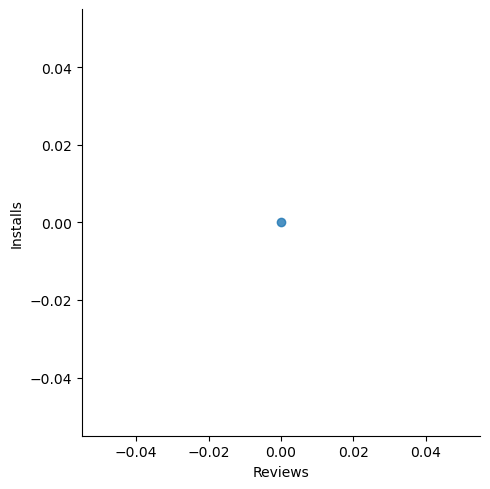

<Figure size 1600x600 with 0 Axes>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Insatlls' with 'Installs'
sns.lmplot(x='Reviews', y='Installs', data=df)

plt.figure(figsize=(16, 6))
plt.show()